In [1]:
%run CINIC_10_dataset.ipynb
import tarfile
import os
import matplotlib.pyplot as plt
import glob
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## The path to The data directory

In [2]:
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)

In [3]:
data_directory = os.path.sep.join([data_directory,  'cinic10'])

In [4]:
if not os.path.exists(data_directory):
    tar = tarfile.open(downloaded_file_location)
    tar.extractall(data_directory)

## Load all Images paths Using Tensorflow.data.Dataset API

In [5]:
data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
paths = list(glob.glob(data_pattern))

In [6]:
len(paths)

270000

## Meta Data of Single Image

In [7]:
image = load_img(paths[0])

In [8]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [9]:
image.format

'PNG'

In [10]:
image.mode

'RGB'

In [11]:
image.size

(32, 32)

##  Load a batch of images using  ImageDataGenerator

In [13]:
image_generator = ImageDataGenerator(horizontal_flip=True, rescale=1.0 / 255.0)

Found 270000 images belonging to 3 classes.


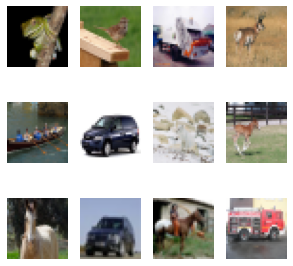

In [14]:
iterator = (image_generator.flow_from_directory(directory=data_directory, batch_size=12))

for batch, _ in iterator:
    plt.figure(figsize=(5, 5))
    
    for index, image in enumerate(batch, start=1):
        ax = plt.subplot(3, 4, index)
        plt.imshow(image)
        plt.axis('off')
    plt.show()
    break